<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>CET Template Notebook</b> <br>
Contact author(s): <i>Author Name</i> <br>
Last verified to run: <i>yyyy-mm-dd</i> <br>
LSST Science Piplines version: Weekly <i>yyyy_xx</i> <br>
Container Size: <i>medium</i> <br>
Targeted learning level: <i>beginner</i> <br>

_In this template, text in italics are examples or instructions that should be: (a) removed if it is not applicable to the notebook; or (b) replaced with text that is appropriate for the notebook. But bold or regular text should appear pretty much as-is in all CET notebooks. For more information, see the [CET's Guidelines for Tutorial Notebooks](https://confluence.lsstcorp.org/pages/viewpage.action?pageId=168857070)._

_While developing, use the following code cell to check that the code conforms to standards, but then delete the cell and "Kernel --> Restart Kernel and Clear All Outputs" before saving and committing._

In [1]:
#%load_ext pycodestyle_magic
#%flake8_on
#import logging
#logging.getLogger("flake8").setLevel(logging.FATAL)

_The six cells below are considered the extended header of the notebook. The first four will be used, verbatim, to create the table of notebook metadata in the README.md file for the repository._

**Description:** _Very brief description of notebook._ Goal is an introduction to deblender products. Some key points to hit: what is a parent, what is a child, describe a deblender, how does it work, what are we telling people about it. bunch of flags in object catalog that are already deblended. notebook can't fully be representative of all science cases for the deblender.

**Skills:** _Brief list of skills to match the README.md file for the repository._

**LSST Data Products:** _List the all of the types of LSST catalogs and images used._

**Packages:** _List the python packages used._ (_List the packages being taught first, e.g., afwDisplay for a notebook about displaying images. Then supporting packages, e.g., lsst.daf.butler for a notebook about displaying images. It is OK to leave out basic support packages like os or glob.)_

**Credit:**
_E.g., "Originally developed by" or "Based on notebooks developed by" and then people's names, including journal article or software release citations if appropriate._
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Find DP0-related documentation and resources at <a href="https://dp0-2.lsst.io">dp0-2.lsst.io</a>. Questions are welcome as new topics in the <a href="https://community.lsst.org/c/support/dp0">Support - Data Preview 0 Category</a> of the Rubin Community Forum. Rubin staff will respond to all questions posted there.

## 1. Introduction

_Provide a light narrative about this notebook, e.g., "This notebook will teach the user..."._

_Cite or link to any external information or documentation, and cross-reference to other notebooks._

This notebook goals are to introduce deblender data products

what is a parent, what is a child, describe a deblender, how does it work, what are we telling people about it. bunch of flags in object catalog that are already deblended . notebook can't fully be representative of all science cases for the deblender.

Info from pipelines.lsst.io:
Seeded by the deepCoadd_mergeDet, the deblender works on each detection to find the flux in each component. The deblend subset produces the deepCoadd_deblendedFlux data product. The measure subset is responsible for measuring object properties on all of the deblended children produced by the deblender. This produces the deepCoadd_meas catalog data product with flux and shape measurement information for each object.

step 1: how to use deblender data prodcuts. Look through pipelines.lsst.io

step 2: reconfiguring deblender and running it can be stretch goal and / or followup tutorial


### 1.1 Package Imports

_All package imports should be done in the first code cell._

_Provide explanation or external links to package documentation, where appropriate._

_E.g., Numpy is a fundamental package for scientific computing with arrays in Python (<a href="https://numpy.org">numpy.org</a>)._

_Use code cell comments to describe the packages being imported._

In [2]:
# general python packages
import numpy as np
import os
import matplotlib.pyplot as plt
import gc
plt.style.use('tableau-colorblind10')

# LSST package for TAP queries
from lsst.rsp import get_tap_service, retrieve_query

# LSST package for Butler queries
import lsst.daf.butler as Butler

# Familiar stack packages
from lsst.geom import Box2I, Box2D, Point2I, Point2D, Extent2I, Extent2D
from lsst.afw.image import Exposure, Image, PARENT

# These may be less familiar objects dealing with multi-band data products
from lsst.afw.image import MultibandExposure, MultibandImage
from lsst.afw.detection import MultibandFootprint, Footprint

# LSST package for image display
import lsst.afw.display as afwDisplay
#import lsst.geom
import lsst.geom as geom

# Astropy imports
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.visualization import make_lupton_rgb
from photutils import * #SkyCircularAperture
from astropy.nddata import Cutout2D

# Pipeline tasks
from lsst.pipe.tasks.characterizeImage import CharacterizeImageTask
from lsst.meas.algorithms.detection import SourceDetectionTask
from lsst.meas.deblender import SourceDeblendTask
from lsst.meas.base import SingleFrameMeasurementTask
afwDisplay.setDefaultBackend('matplotlib')

### 1.2 Define Functions and Parameters

_If your notebook defines functions or parameters to use later or throughout, do it here in sub-section 1.2._

_It is OK to rename the subsection to be more specific to the notebook, and/or to use sub-sub-sections like "1.2.1 Define global cosmological parameter values" or "1.2.2 Define a function to make an image cutout"._

_It is OK to remove this sub-section if it is not being used._

## 2. Section Heading

_Use numbers for sections, sub-sections, and sub-sub-sections to enable referencing, e.g., "I'm having trouble with the second code cell in Section 2.3."_

_Use section titles that actively describe what is being done, e.g., "Create a color-magnitude diagram" instead of "Plot", so that the auto-generated table of contents is easy to navigate._

### 2.1 Section Sub-heading

#### 2.1.1 Section Sub-sub-heading

In [3]:
# A function and settings  to plot a cutout from tutorial notebook 03a

# Set up some plotting defaults:

params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [8, 8],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

def cutout_coadd(butler, ra, dec, band='r', datasetType='deepCoadd',
                 skymap=None, cutoutSideLength=51, **kwargs):
    """
    Produce a cutout from a coadd at the given ra, dec position.

    Adapted from DC2 tutorial notebook by Michael Wood-Vasey.

    Parameters
    ----------
    butler: lsst.daf.persistence.Butler
        Servant providing access to a data repository
    ra: float
        Right ascension of the center of the cutout, in degrees
    dec: float
        Declination of the center of the cutout, in degrees
    band: string
        Filter of the image to load
    datasetType: string ['deepCoadd']
        Which type of coadd to load.  Doesn't support 'calexp'
    skymap: lsst.afw.skyMap.SkyMap [optional]
        Pass in to avoid the Butler read.  Useful if you have lots of them.
    cutoutSideLength: float [optional]
        Size of the cutout region in pixels.

    Returns
    -------
    MaskedImage
    """
    radec = geom.SpherePoint(ra, dec, geom.degrees)
    cutoutSize = geom.ExtentI(cutoutSideLength, cutoutSideLength)

    if skymap is None:
        skymap = butler.get("skyMap")

    # Look up the tract, patch for the RA, Dec
    tractInfo = skymap.findTract(radec)
    patchInfo = tractInfo.findPatch(radec)
    xy = geom.PointI(tractInfo.getWcs().skyToPixel(radec))
    bbox = geom.BoxI(xy - cutoutSize // 2, cutoutSize)
    patch = tractInfo.getSequentialPatchIndex(patchInfo)

    coaddId = {'tract': tractInfo.getId(), 'patch': patch, 'band': band}
    parameters = {'bbox': bbox}

    cutout_image = butler.get(datasetType, parameters=parameters,
                              dataId=coaddId)

    return cutout_image

In [4]:
service = get_tap_service()
assert service is not None
assert service.baseurl == "https://data.lsst.cloud/api/tap"

# A random assortment of useful notes:

#Recommended Search Parameter “detect_isPrimary = True”: A good default search query parameter 
# for the Object, Source, and ForcedSource catalogs is to set detect_isPrimary = True. 
# The detect_isPrimary parameter is True if a source has no children, is in the inner region of a 
#coadd patch, is in the inner region of a coadd tract, and is not “detected” in a pseudo-filter. 


#https://pipelines.lsst.io/modules/lsst.pipe.tasks/deblending-flags-overview.html

# Catalog are objects in each visit (not coadded)
# the DP0.2 Schema Browser is helpful:
# https://dm.lsst.org/sdm_schemas/browser/dp02.html
# .Source catalog properties related to blending:
# parentSourceId, blendedness_abs, blendedness_flag, blendedness_flag_noCentroid, blendedness_flag_noShape

# Object catalog is sources in the final catalog
# .Object properties related to blending:
# deblend_nChild, deblend_skipped, detect_fromBlend, detect_isDeblendedModelSource,
# detect_isDeblendedSource, detect_isIsolated, detect_isPrimary, parentObjectId, i_blendedness,
# i_blendedness_flag, r_blendedness, r_blendedness_flag, (ditto u,g,y,z)

# object can use colors in its deblender


In [5]:
# First, pick a bunch of sources within a circular search radius around a galaxy cluster:

#dp

#center_coords = SkyCoord(55.6521739130, -31.9834710744, frame='icrs', unit='deg')
center_coords = SkyCoord(55.7393808,-32.2751775, frame='icrs', unit='deg')
search_radius = 10*u.arcmin

use_center_coords = "55.7393808, -32.2751775"
use_radius = "0.02"
 
max_rec = 10

query = "SELECT objectId, x, y, coord_ra, coord_dec, detect_isPrimary, deblend_nChild, deblend_skipped, detect_fromBlend, " + \
        "detect_isDeblendedModelSource, detect_isDeblendedSource, detect_isIsolated, parentObjectId " + \
        "FROM dp02_dc2_catalogs.Object " + \
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), " + \
        "CIRCLE('ICRS', " + use_center_coords + ", " + use_radius + ")) = 1 " + \
        "AND  detect_fromBlend = 1 " #This source is deblended from a parent with more than one child
        #"AND detect_isPrimary = 0 " #True if source has no children and is in the inner region of a coadd patch and is in the inner region of a coadd tract and is not detected in a pseudo-filter
        
results_notPrimary = service.search(query)#, maxrec=max_rec)
#assert len(results1) == max_rec

# Convert the results to an Astropy table, then
#   take a look at the table.
tab_notPrimary = results_notPrimary.to_table()
#tab_notPrimary 


In [6]:
query = "SELECT objectId, x, y, coord_ra, coord_dec, detect_isPrimary, deblend_nChild, deblend_skipped, detect_fromBlend, " + \
        "detect_isDeblendedModelSource, detect_isDeblendedSource, detect_isIsolated, parentObjectId " + \
        "FROM dp02_dc2_catalogs.Object " + \
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), " + \
        "CIRCLE('ICRS', " + use_center_coords + ", " + use_radius + ")) = 1 " + \
        "AND detect_isIsolated = 1"
#        "AND detect_isPrimary = 1 " # we want to remove this, make False to return blends

results_Isolated = service.search(query)#, maxrec=max_rec)
#assert len(results1) == max_rec

# Convert the results to an Astropy table, then
#   take a look at the table.
tab_Isolated = results_Isolated.to_table()
#tab_notPrimary 

In [7]:
query = "SELECT objectId, x, y, coord_ra, coord_dec, detect_isPrimary, deblend_nChild, deblend_skipped, detect_fromBlend, " + \
        "detect_isDeblendedModelSource, detect_isDeblendedSource, detect_isIsolated, parentObjectId " + \
        "FROM dp02_dc2_catalogs.Object " + \
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), " + \
        "CIRCLE('ICRS', " + use_center_coords + ", " + use_radius + ")) = 1 " + \
        "AND detect_isPrimary = 1 " # we want to remove this, make False to return blends

results_Primary = service.search(query)#, maxrec=max_rec)
#assert len(results1) == max_rec

# Convert the results to an Astropy table, then
#   take a look at the table.
tab_Primary = results_Primary.to_table()
#tab_notPrimary 

55.7506834813934 -32.28892993702273
The size of the cutout in pixels is:  (501, 501)


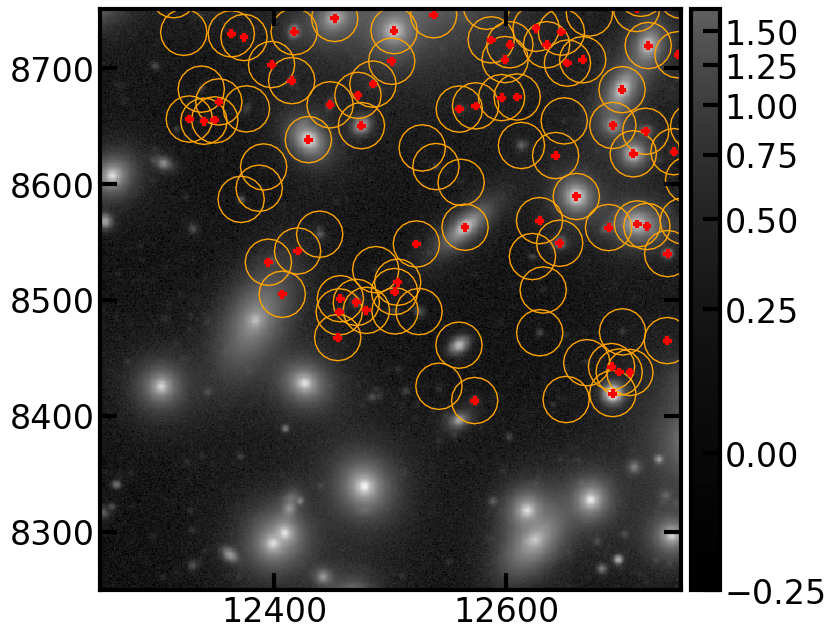

In [8]:
# prepare to do the cutout from tutorial notebook 03
config = 'dp02'
collection = '2.2i/runs/DP0.2'
butler = Butler.Butler(config, collections=collection)

dataId = {'tract': 4431, 'patch': 17, 'band': 'i'}
datasetType = 'deepCoadd'
# Retrieve the data using the `butler` instance and its function `get()`
coadd = butler.get(datasetType, **dataId)

# First, we need to extract the WCS solution, which provides the mapping
#   between XY pixel values and sky coordinates:
wcs = coadd.getWcs()

# The cluster seems to be centered at about (X, Y) ~ (12500, 8500).
# We can use the "pixelToSky" method of the WCS to get the sky coordinates:
radec = wcs.pixelToSky(12500, 8500)
ra, dec = radec.getRa().asDegrees(), radec.getDec().asDegrees()
print(ra, dec)

# Select a position at roughly the center of the galaxy cluster:
cutout_image = cutout_coadd(butler, ra, dec, band='i', datasetType='deepCoadd',
                            cutoutSideLength=501)
print("The size of the cutout in pixels is: ", cutout_image.image.array.shape)

# Display the image cutout
fig, ax = plt.subplots()
display = afwDisplay.Display(frame=fig)
display.scale('asinh', 'zscale')
display.mtv(cutout_image.image)

# We use display buffering to avoid re-drawing the image
#  after each source is plotted
with display.Buffering():
    for i in range(len(tab_notPrimary)):
        display.dot('+', tab_notPrimary[i]['x'], tab_notPrimary[i]['y'], ctype=afwDisplay.RED)
    for j in range(len(tab_Primary)):
        display.dot('o', tab_Primary[j]['x'], tab_Primary[j]['y'], size=20, ctype='orange')
    #for k in range(len(tab_Isolated)):
        #display.dot('^', tab_Isolated[k]['x'], tab_Isolated[k]['y'], ctype='blue')

plt.show()
#remove_figure(fig)

In [9]:
# get info about your cutout
refTable = butler.get('deepCoadd_ref',  tract=4431, patch=17)
refTable.schema.find('detect_isPrimary')
#refTable.schema.getNames()


SchemaItem(key=Key['Flag'](offset=1520, bit=26), field=Field['Flag'](name="detect_isPrimary", doc="true if source has no children and is in the inner region of a coadd patch and is in the inner region of a coadd tract and is not "detected" in a pseudo-filter (see config.pseudoFilterList)"))

In [10]:
# questions for melissa:
# - butler vs TAP for catalog access? when to use?
# butler is inefficient for catalog access because it returns all columns for everything in
# a track at once. This can be good for some circumstances, such as getting all objects
# inside an track/image. TAP is better for querying things that meet some criteria. 

# - is there a segmentation map somewhere that identifies the deblending mask?
# could be called "the footprint" see notebook 05 section 4. See also 
# https://github.com/LSSTScienceCollaborations/StackClub/blob/master/SourceDetection/Footprints.ipynb
# - Looks like detect_isDeblendedSource = 1 and detect_isPrimary = 1 return the same thing?

# action items:

# look in catalog and search for particular sources that have many blends (DP0.2 doesn't
# have low z big galaxies, only 6 years of data and also because cosmology focused 
# simulation).

# go through notebook5 and learn what it is doing. this will inform stretch activities
# for this notebook. We are not yet sure what the user-tunable parameters for the 
# deblender are, so we have to find them another way. Then we will have meeting with 
# Fred about deblender later. 

# scarlet is imbedded in lsst pipelines, but ALex's notebooks are a few years old so
# are many pipeline versions ago. It is now in the pipeline. I should not have to install
# it for myslef. Can look at what scarlet config params those old notebooks tweaked
# can be used to map into the lsst science pipeline framework (might be called something
# different etc).

# maybe (at the end) even re-run the deblender with different parameters (stretch goal)
# deblend is also done in notebook 05 but none of the parameters are changed. So here if 
# we get to the poitn where we can see what the user-changable parameters are, we could
# do a couple of demos. 

# in the geoviews jira ticket, just keep a log of what you did (i.e. can't find example
# of any astro applications of it). Since Keith (or Leanne?) suggested it we could also close the loop
# with him and ask if he had any examples in mind or has he seen it. Can a convenient
# astropy package for this already exist?

#### 2.1.2 Section most blended objects

In [16]:
# Identify some examples of very blended sources, and then plot on the footprint
# one plan: identify some blends, locate the coadd tract and patch for one of them (maybe based on ra/dec?), plot footprints with source ra/dec on top



query = "SELECT objectId, x, y, coord_ra, coord_dec, detect_isPrimary, deblend_nChild, deblend_skipped, detect_fromBlend, " + \
        "detect_isDeblendedModelSource, detect_isDeblendedSource, detect_isIsolated, parentObjectId, footprintArea, z_blendedness, " + \
        "tract, patch " + \
        "FROM dp02_dc2_catalogs.Object " + \
        "WHERE deblend_nChild > 4 " # Number of children this object has (defaults to 0)

# output explanations:
#detect_isPrimary 	True if source has no children, is in inner region of a coadd patch and is in the inner region of a coadd tract and is not detected in a pseudo-filter (see config.pseudoFilterList)
#deblend_skipped 	Deblender skipped this source
#detect_fromBlend 	This source is deblended from a parent with more than one child.
#detect_isDeblendedModelSource 	True if source has no children and is in the inner region of a coadd patch and is in the inner region of a coadd tract and is not detected in a pseudo-filter (see config.pseudoFilterList) and is a deblended child
#parentObjectId 	Unique ID of parent source. Reference band.
#detect_isDeblendedSource 	True if source has no children and is in the inner region of a coadd patch and is in the inner region of a coadd tract and is not detected in a pseudo-filter (see config.pseudoFilterList) and is either an unblended isolated source or a deblended child from a parent with
#footprintArea  	Number of pixels in the sources detection footprint. Reference band.

# search for everything with parentobjID as one of these then you should get n_deblend sources.
# when talkign to data production: best to have a well constrained problem. here's this one thing
# here's what i'm trying to do, what is the next step. faster response this way.
# make a new notebook where i outline one source example. ask 1 question at a time. 10min

max_rec = 50
results_maxblend = service.search(query, maxrec=max_rec)
#assert len(results1) == max_rec

# Convert the results to an Astropy table, then
#   take a look at the table.
tab_maxblend = results_maxblend.to_table()
tab_maxblend 

objectId,x,y,coord_ra,coord_dec,detect_isPrimary,deblend_nChild,deblend_skipped,detect_fromBlend,detect_isDeblendedModelSource,detect_isDeblendedSource,detect_isIsolated,parentObjectId,footprintArea,z_blendedness,tract,patch
,pix,pix,deg,deg,,,,,,,,,pix,,,
int64,float64,float64,float64,float64,bool,int32,bool,bool,bool,bool,bool,int64,int32,float64,int64,int64
1325245763004924878,12013.1306277,20419.8797913,49.8723055,-42.0398875,False,6,False,False,False,False,False,0,1045,0.0,3074,37
1325245763004924808,8300.4424766,20330.1534431,50.1500516,-42.0441792,False,12,False,False,False,False,False,0,4864,0.0,3074,37
1325245763004924789,11134.9459729,20364.6942406,49.938006,-42.0428498,False,5,False,False,False,False,False,0,764,0.0,3074,37
1325245763004924940,9639.7559078,20439.4242893,50.0498321,-42.0384361,False,5,False,False,False,False,False,0,841,0.0,3074,37
1325245763004924935,9747.9207243,20481.4008105,50.0417297,-42.0361268,False,5,False,False,False,False,False,0,1611,0.0,3074,37
1325245763004924937,11382.3431436,20430.9829233,49.9194879,-42.0392002,False,8,False,False,False,False,False,0,2727,0.0,3074,37
1325245763004924982,12011.3054403,20470.3371356,49.8724354,-42.0370843,False,13,False,False,False,False,False,0,4199,0.0,3074,37
1325245763004924907,7927.0,20423.0,50.1779496,-42.0389146,False,5,False,False,False,False,False,0,1842,0.0,3074,37


<Figure size 3000x3000 with 0 Axes>

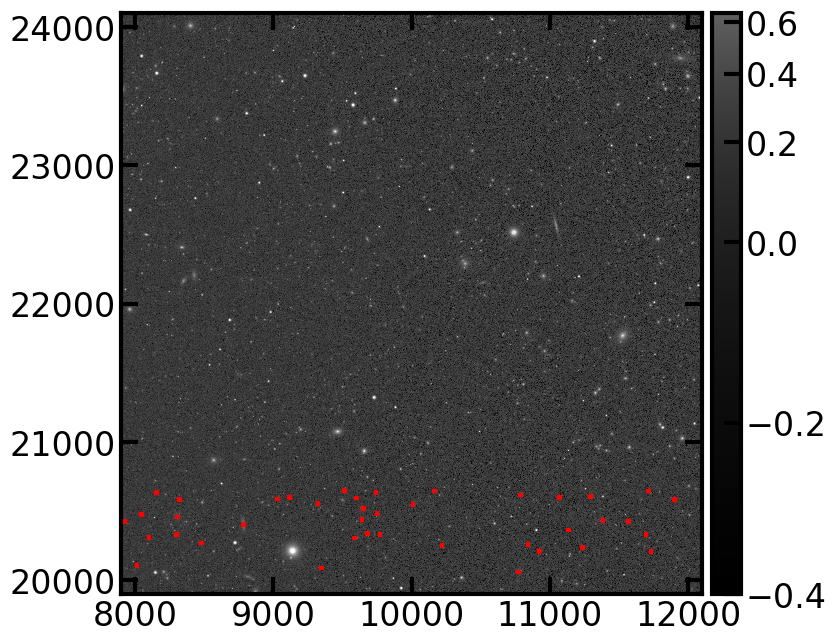

In [17]:
collection = '2.2i/runs/DP0.2'
datasetType = "deepCoadd"
config = "dp02"
dataId = {'tract': tab_maxblend['tract'][0], 'band': 'i', 'patch': tab_maxblend['patch'][0] }  
blend_coadd = butler.get(datasetType, **dataId)

# LOOK INTO THIS DEBLEND_METADATA MORE:
deblend_metadata = butler.get("deblend_metadata", **dataId)

# Take a look at the image of the patch
plt.figure(figsize=(30,30))
afw_display = afwDisplay.Display()
afw_display.setMaskTransparency(100)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(blend_coadd.getMaskedImage()) # what does getMaskedImage do?

# We use display buffering to avoid re-drawing the image
#  after each source is plotted
with afw_display.Buffering():
    for i in range(len(tab_maxblend)):
        afw_display.dot('+', tab_maxblend[i]['x'], tab_maxblend[i]['y'], ctype=afwDisplay.RED)


In [21]:
# Questions for Melissa week of Nov 8:
# - I think what I'm looking for here is what children belong to the same deblend.
# - cant figure out how to grab a set of blends from the same deblended object
# - can't figure out how to extract a footprint for a coadd without running the deblender again (see https://github.com/LSSTScienceCollaborations/StackClub/blob/master/SourceDetection/Footprints.ipynb)
# - what does getMaskedImage do?
# mask plane may contain (flags bad pixels, detection)
# - Struggling with accessing Footprint and MultibandFootprint (class in afw). How to use, are there leftover data products or does detection have to be run?
# in notebook 4b there's a way to say tell me everything accessible by butler. there are possibly no image metadata 
# avail from deepcoadd (since this product of deblender comes after deepcoadd is generated).
# deblend_metadata is a property set

# https://github.com/lsst/afw/blob/main/doc/lsst.afw.multiband/multiband.rst

#geoviews: look in the way of whether things look nice? or fast at rendering ? what is the thing that makes it cool.

# Suggestions Nov 17 for science application:
#do we know if the parent has a non-deblended flux
#merger fractions as fn of redshift? or host identification for time domain
#can you select on children that have different colors than parent? 


# - what does AFW stand for? soemthing frameworks
# Explore deblend_metadata
#help(blend_coadd)
deblend_metadata = butler.get("deblend_metadata", **dataId)
#help(deblend_metadata) is basically useless info

In [ ]:
# This is very slow. TAP is optimized to search on RA / Dec not other stuff. Do not use.
#query_children = "SELECT objectId, x, y, coord_ra, coord_dec, detect_isPrimary, deblend_nChild, deblend_skipped, detect_fromBlend, " + \
#        "detect_isDeblendedModelSource, detect_isDeblendedSource, detect_isIsolated, parentObjectId, footprintArea, z_blendedness, " + \
#        "tract, patch " + \
#        "FROM dp02_dc2_catalogs.Object " + \
#        "WHERE patch = " + str(tab_maxblend[0]['patch']) + " AND tract = " + str(tab_maxblend[0]['tract']) +  \
#        "AND parentObjectID = " + str(sel_objid)

# first search on RA/Dec and then use a where statement to pull out targets based on ID    
query_children = "SELECT ObjectId, x, y, coord_ra, coord_dec, detect_isPrimary, deblend_nChild, deblend_skipped, detect_fromBlend, " + \
        "detect_isDeblendedModelSource, detect_isDeblendedSource, detect_isIsolated, parentObjectId, footprintArea, z_blendedness, " + \
        "tract, patch " + \
        "FROM dp02_dc2_catalogs.Object " + \
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec ), " + \
        "CIRCLE('ICRS', " + str(ra) + ", " + str(dec) + ", 0.01)) = 1 "   
